### Integrantes

Rafael Augusto Monteiro - 9293095  
William Quelho Ferreira - 9293421

# Exploração dos dados - Parte V

Datasets selecionados:
* Titanic


In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Titanic

In [8]:
path = "datasets/titanic/train.csv"

df = pd.read_csv(path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Perguntas

1. O desbalanceamento, em geral, causa problemas para a classificação. Trate o desbalanceamento utilizando as abordagens de subamostragem, superamostragem. Para realizar a subamostragem e a superamostragem chame a função sample do DataFrame. Abaixo tem um exemplo de como utilizar essa função. Mostre a distribuição das classes após o balanceamento. Utilize a função classificação definida abaixo ajustando o parâmetro weights para um valor que você ache adequado. Esse parâmetro faz com que o algoritmo de classificação leve em conta o peso da classe no processo de treinamento. Utilize 2 valores de weights diferentes e comente o resultado (o que você acha que mudou com esses valores diferentes de weights). 

2. Faça a conversão entre tipos para dois atributos. Escolha as conversões que achar mais adequada, quantitativo para qualitativo ou qualitativo para quantitativo. Explique o que você fez e porque achou essa a melhor forma de fazer. Para referência consulte os slides 9-21.

3.  Realize a normalização de duas colunas. Para normalizar utilize a abordagem 0-1 (slide 27) e z-score (slide 29). Apresente métricas que comprove que a normalização foi realizada (boxplot, histograma, ...).



## Respostas

### Amostragens

#### Realizando subamostragem

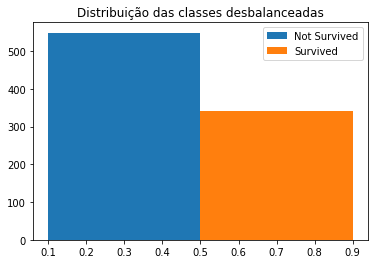

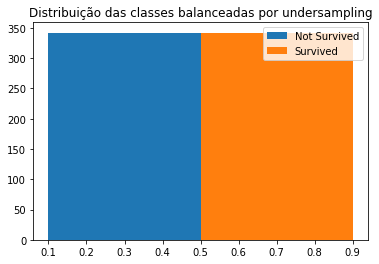

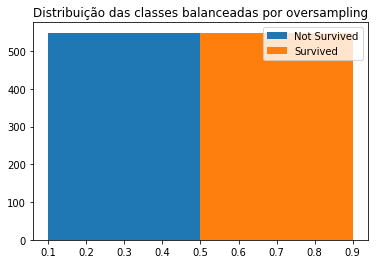

In [139]:
# calculando percentagem de cada classe
n_surv = df['Survived'].sum()
surv = df[df['Survived'] == 1]
not_surv = df[df['Survived'] == 0]

plt.title('Distribuição das classes desbalanceadas')
plt.hist([not_surv['Survived'],surv['Survived']], label=['Not Survived','Survived'],bins=[0,1], align='mid')
plt.legend()
plt.show()

# w tem uma lista com 1 em cada instância do dataset que sobreviveu
w = df.loc[:,'Survived']
surv = df.sample(n=n_surv,weights=w,axis=0)
not_surv = df.sample(n=n_surv,weights=np.logical_not(w),axis=0)

plt.title('Distribuição das classes balanceadas por undersampling')
plt.hist([not_surv['Survived'],surv['Survived']], label=['Not Survived','Survived'],bins=[0,1], align='mid')
plt.legend()
plt.show()

# juntando amostra de sobreviventes com amostra de nao sobreviventes  e aleatorizando com frac
undersampled = pd.concat([surv,not_surv],axis=0).sample(frac=1)


n_not_surv = len(df) - n_surv
diff_n = n_not_surv - n_surv

not_surv = df.sample(n=n_not_surv,weights=np.logical_not(w),axis=0)
surv_over = df.sample(n=diff_n, weights=w, axis=0)
surv = pd.concat([surv, surv_over], axis=0).sample(frac=1)

plt.title('Distribuição das classes balanceadas por oversampling')
plt.hist([not_surv['Survived'],surv['Survived']], label=['Not Survived','Survived'],bins=[0,1], align='mid')
plt.legend()
plt.show()

oversampled = pd.concat([not_surv, surv_over], axis=0).sample(frac=1)

In [177]:
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std


def classificacao(data, columns, target, weights, title_prefix = ''):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    weights:    Dicionário. Pesos das classes, cada chave do dicionário é a classe e seu valor a probabilidade
    ---------------------------------------------------------------
    Realiza a classificação em 3 modelos (SVM com kernel linear, 
    SVM com kernel polinomial de grau 3, Árvore de decisão)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados e as medidas de desempenho
    """
    
    # inicializa os modelos com os parâmetros solicitados
    svm_l = SVC(C=10*len(data), kernel='linear', cache_size=500, max_iter=1e6, class_weight=weights)
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6, class_weight=weights)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1), class_weight=weights)
    
    clfs = [svm_l, svm_n, dt]
    clfs_names = ['svm_linear', 'svm_poly', 'dt']
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=5, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'svm_linear':[], 'svm_poly':[], 'dt':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( clf.score(x_test, y_test) )
    
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - acurácia'
    plt.title(f'{title_prefix} {title}')
    plt.show()
    
    return {'results': results, 'clfs':clfs}

#### Rodando a função de classificação com weights

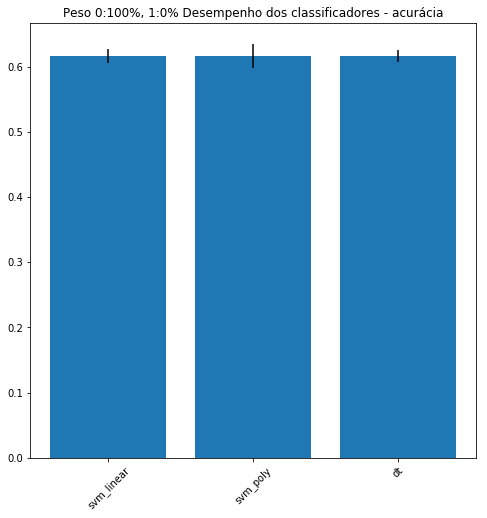

c:\program files\python37\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


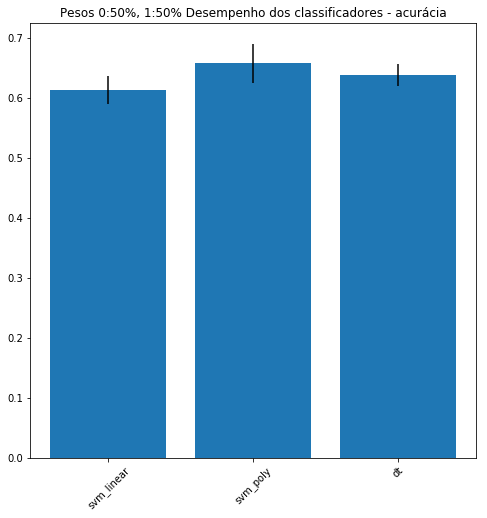

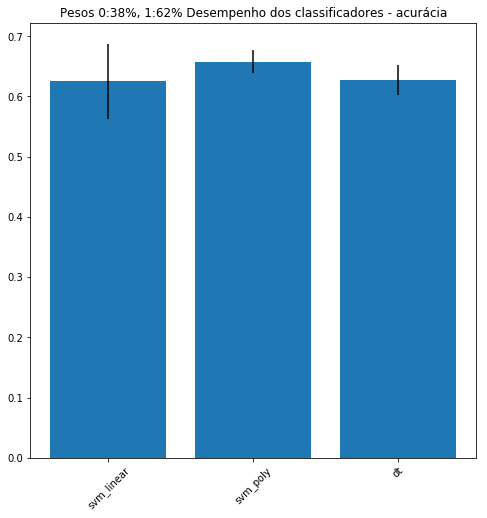

In [179]:
def normalize(dataframe):
    return (dataframe - dataframe.min())/(dataframe.max() - dataframe.min())

# Removendo os sem idade
clean = normalize(df.loc[:,['Age', 'SibSp', 'Parch','Survived']].dropna())

# Substituindo pela médiana
median = normalize(df.loc[:,['Age','SibSp', 'Parch','Survived']].fillna(np.round(clean['Age'].median())))
median.Survived = median.Survived.astype(int)

# Calculando probabilidades de cada classe
weights = {0:n_surv/len(median) , 1:1-(n_surv/len(median))}

cols = [0,1,2]
# Rodando classificador com pesos 

clf = classificacao(median, cols, 3, weights={0:1,1:0}, title_prefix='Pesos 0:100%, 1:0%')
clf = classificacao(median, cols, 3, weights={0:0.5,1:0.5}, title_prefix='Pesos 0:50%, 1:50%')
clf = classificacao(median, cols, 3, weights=weights, title_prefix=f'Pesos 0:{weights[0]:.0%}, 1:{weights[1]:.0%}')

### Conversão

Escolhemos converter o campo sex para dois campos: male e female. Essa é uma conversão qualitativa para quantitativa. Foi escolhida a transformação 1-para-n pois não existe relação de ordem entre male e female, não sendo possível apenas transformar a variável para valores binários.

In [185]:
# Rodando get_dummies em sex
converted = pd.get_dummies(df,columns=['Sex'])
converted.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [193]:
from scipy import stats

# Normalizando utilizando abordagem 0-1
def normalize(dataframe):
    return (dataframe - dataframe.min())/(dataframe.max() - dataframe.min())

normalize(df[])

# non_nan_df = df.dropna()
# stats.zscore(non_nan_df.iloc[:,[1,2,5,6,7,9]],axis=1)

ValueError: operands could not be broadcast together with shapes (4455,) (5,) 

3. A etapa de limpeza realizada será remover as instâncias com idade NaN e normalização dos valores para o intervalo 0-1. Foram realizados testes usando a média e removendo as entradas com idade NaN.

In [29]:
def normalize(dataframe):
    return (dataframe - dataframe.min())/(dataframe.max() - dataframe.min())

# Removendo os sem idade
clean = normalize(df.loc[:,['Age', 'SibSp', 'Parch','Survived']].dropna())

# Substituindo pela média
median = normalize(df.loc[:,['Age','SibSp', 'Parch','Survived']].fillna(np.round(clean['Age'].median())))

4. Será realizada a classificação de sobrevivência utilizando como atributos o número de parentes e a idade.

In [30]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std


def reg_clas(data, columns, target, regression=False):
    """
    Executa classificação ou regressão do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    regression: Boleano. True para realizar uma regressão e False para classificação
    ---------------------------------------------------------------
    Realiza a classificação/regressão em 4 modelos (SVM com kernel linear, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, e knn com k=5)
    Plot o gráfico de desempenho para cada classificador/regressor.
    Retorna um dicionário com os classificadores/regressores treinados e as medidas de desempenho
    """
    
    # inicializa os modelos com os parâmetros solicitados
    if regression:
        svm_l = SVR(C=10*len(data), kernel='linear', cache_size=500, max_iter=1e6)
        svm_n = SVR(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
        dt = DecisionTreeRegressor(criterion='mse', splitter='best', min_samples_split=int(len(data)*0.05))
        knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='kd_tree')
    else:
        svm_l = SVC(C=10*len(data), kernel='linear', cache_size=500, max_iter=1e6)
        svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
        dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
        knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='kd_tree')
    
    clfs = [svm_l, svm_n, dt, knn]
    clfs_names = ['svm_linear', 'svm_poly', 'dt', 'knn']
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=5, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'svm_linear':[], 'svm_poly':[], 'dt':[], 'knn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # realiza predição no conjunto de teste e salva o resultado
            if regression:
                results[c_name].append( mean_squared_error(clf.predict(x_test), y_test) )
            else:
                results[c_name].append( clf.score(x_test, y_test) )
    
    # faz o plot de desempenho dos classificadores/regressores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos regressores - erro quadrático médio' if regression else \
            'Desempenho dos classificadores - acurácia'
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}

In [31]:
# Rodando classificador sem limpeza dos dados
try:
    no_preprocess_result = reg_clas(df,[5,6,7],1)
except Exception as e:
    print(f'não funcionou! erro: "{e}"')

não funcionou! erro: "Input contains NaN, infinity or a value too large for dtype('float64')."


c:\program files\python37\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


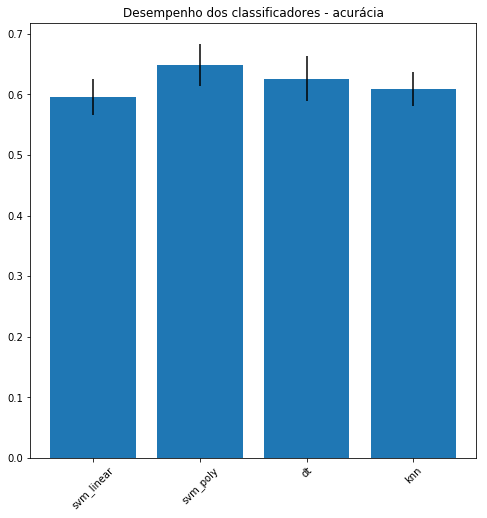

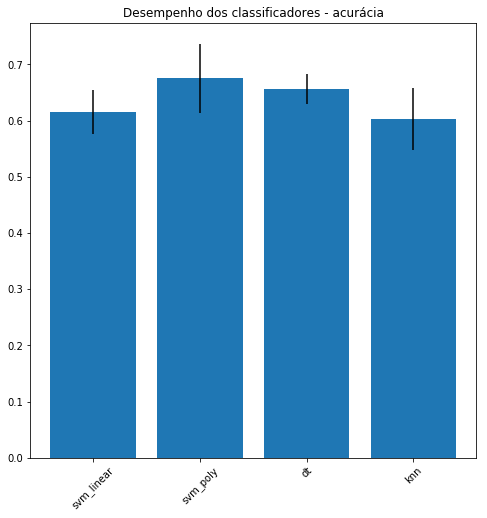

In [32]:
# Rodando classificador com limpeza dos dados
clean_result = reg_clas(clean,[0,1,2],3)
median_result = reg_clas(median,[0,1,2],3)

Sem a limpeza dos dados, não foi possível rodar o classificador. Utilizando a limpeza por mediana, o desempenho do algoritmo Knn foi ligeiramente melhor do que utilizando a limpeza por remoção. Nos demais casos, ambos os resultados foram equivalentes.

## Dados Ensino Básico

In [33]:
path = "../datasets/instituicoes_ensino_basico/CADASTRO_MATRICULAS_REGIAO_SUDESTE_SP_2012.csv"

df = pd.read_csv(path, encoding="ISO-8859-1", sep=";", engine="python", header=11, skipfooter=2)
df[ df['REDE'] == 'Privada' ]

,ANO_CENSO,PK_COD_ENTIDADE,Nome_Escola,REDE,ID_DEPENDENCIA_ADM,Dependencia_Administrativa,CATESCPRIVADA,Localizacao,REGIAO,FK_COD_ESTADO,...,MATEEINCL,NESCEE,MATESPTOT,NESCEDESP,MATESP,NESCEDESPEXCLUS,MATESPEXCLUS,NESCEDESPCLESP,MATESPCLESP,ESCACESS
285,2012,35003025,LAR DE MENORES DE SANTA ADELIA,Privada,4,Privada,Filantropica,Urbana,Sudeste,35,...,0,0,0,0,0,0,0,0,0,0
321,2012,35003396,SANTA RITA DE CASSIA ASSOCIACAO DE CARIDADE,Privada,4,Privada,NaN,Urbana,Sudeste,35,...,0,0,0,0,0,0,0,0,0,0
433,2012,35004650,OS SAMARITANOS SOCIEDADE BENEFICENTE ESPIRITA,Privada,4,Privada,Filantropica,Urbana,Sudeste,35,...,1,1,1,0,0,0,0,0,0,0
478,2012,35005101,NINO PACHECO CASA DA CRIANCA,Privada,4,Privada,Filantropica,Urbana,Sudeste,35,...,0,0,0,0,0,0,0,0,0,0
940,2012,35010340,CR P CONV NOVA SANT ANA II,Privada,4,Privada,Filantropica,Urbana,Sudeste,35,...,0,0,0,0,0,0,0,0,0,0
1008,2012,35011236,INESP ESCOLA TECNICA,Privada,4,Privada,Particular,Urbana,Sudeste,35,...,0,0,0,0,0,0,0,0,0,0
1355,2012,35015933,SALOMAO COLEGIO,Privada,4,Privada,NaN,Urbana,Sudeste,35,...,0,0,0,0,0,0,0,0,0,0
1446,2012,35017048,CASTELO PEQUENO MUNDO ESCOLA DE EDUCACAO INFANTIL,Privada,4,Privada,Particular,Urbana,Sudeste,35,...,0,0,0,0,0,0,0,0,0,0
1544,2012,35018223,CETEB CENTRO TECNOLOGICO E EDUCACIONAL DE BOITUVA,Privada,4,Privada,Particular,Urbana,Sudeste,35,...,0,0,0,0,0,0,0,0,0,0
1857,2012,35022019,PRINCIPE DA PAZ ESCOLA DE EDUCACAO INFANTIL,Privada,4,Privada,Particular,Urbana,Sudeste,35,...,0,0,0,0,0,0,0,0,0,1


### Perguntas

1. Reportar porcentagem de amostras com problema. Definir o que é problema no seu cenário. Problema pode ser valor ausente, inconsistente, ou outras formas que você acredita ser um problema. Especificar o problema por atributo, se você identificou problema nos atributos A e C, reportar a porcentagem de problema para cada um desses atributos.
2. Argumente se você acha que esses problemas têm origem sistemática ou aleatória.
3. Realize uma etapa de limpeza que você achar necessária. Comente as etapas realizadas. Por limpeza vide as atividades nos slides 13 em diante. Você pode achar apenas necessário fazer imputação dos dados ou então se forem poucas amostras com valores ausentes, remover essas amostras, mas sempre justifique o porque você fez isso.
4. Execute a função com os classificadores ou regressores, dependendo do seu problema, antes e depois da limpeza dos dados. Comente se o classificador conseguiu executar antes da limpeza ser realizada, e se houve melhora no desempenho.


### Respostas

1. Nosso problema são valores NaN na coluna CATESCPRIVADA. Acreditamos que a caterigoria da escola privada é importante para as regressões. Cerca de 13% das escolas privadas não possuem valor na coluna CATESCPRIVADA

In [34]:
# Contando percentual de escolas privadas sem categoria
na_count = pd.isna(df[ df['REDE'] == 'Privada' ]['CATESCPRIVADA']).sum()
print(f'percentual de colégios privados sem categoria:{na_count / df[ df["REDE"] == "Privada" ].shape[0]: .0%}')

percentual de colégios privados sem categoria: 13%


2. O problema aparenta ser sistemático. Provavelmente os criadores do dataset não encontraram informações sobre a categoria do colegio privado.

3. A etapa de limpeza realizada será remover as instâncias com categoria NaN, troca de variáveis categóricas por variaveis dummy e normalização dos valores numéricos para o intervalo 0-1.

In [35]:
def normalize(dataframe):
    return (dataframe - dataframe.min())/(dataframe.max() - dataframe.min())

# Removendo os sem categoria
clean = df.loc[:,['MATTOTAL', 'CATESCPRIVADA', 'REDE','NUM_FUNCIONARIOS']]
clean = normalize(pd.get_dummies(clean).dropna())
clean.head()

,MATTOTAL,NUM_FUNCIONARIOS,CATESCPRIVADA_Comunitaria,CATESCPRIVADA_Confessional,CATESCPRIVADA_Filantropica,CATESCPRIVADA_Particular,REDE_Privada,REDE_Pública
0,0.864865,0.044759,0.0,0.0,0.0,0.0,0.0,1.0
1,0.003666,0.111896,0.0,0.0,0.0,0.0,0.0,1.0
2,0.002385,0.078916,0.0,0.0,0.0,0.0,0.0,1.0
3,0.002524,0.069494,0.0,0.0,0.0,0.0,0.0,1.0
4,0.001335,0.045936,0.0,0.0,0.0,0.0,0.0,1.0


4. Será realizada a classificação de sobrevivência utilizando como atributos o número de parentes e a idade.

In [36]:
# Rodando classificador sem limpeza dos dados
my_df = pd.get_dummies(df.loc[:,['MATTOTAL', 'CATESCPRIVADA', 'REDE','NUM_FUNCIONARIOS']])
try:
    no_preprocess_result = reg_clas(my_df,range(1,6),0)
except Exception as e:
    print(f'não funcionou! erro: "{e}"')

não funcionou! erro: "Input contains NaN, infinity or a value too large for dtype('float64')."


c:\program files\python37\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


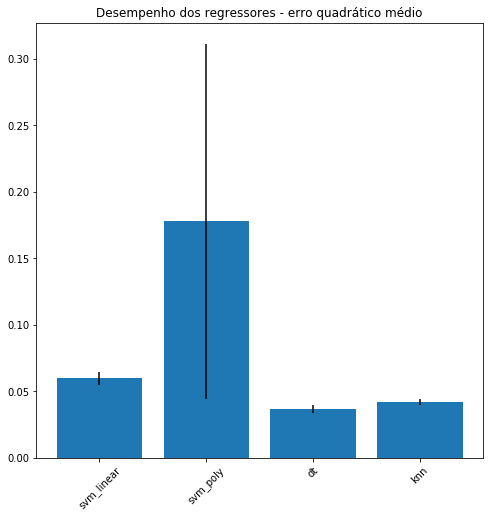

In [37]:
# Rodando classificador com limpeza dos dados
# não rodou com muitas instâncias, por isso limitamos em 5000
clean_result = reg_clas(clean.sample(frac=1)[:5000],range(1,6),0,regression=True)

Sem a limpeza dos dados, não foi possível rodar o classificador. Utilizando a limpeza, foi possivel rodar o classificador. O desempenho do svm_poly não foi muito alto. Xupa